           Hama  T1 (Ringan)  T2 (Sedang)  T3 (Berat)  T4 (Ekstra Khusus)
0  Virus Kuning         7.85         1.95        0.65                0.20
1    Lalat Buah        14.50         2.00        0.25                0.10
2    Antraknose        10.20         0.60        0.35                0.25
3        Thrips         9.30         1.10        0.40                0.15
4     Kutu Daun         2.90         0.20        0.15                0.05


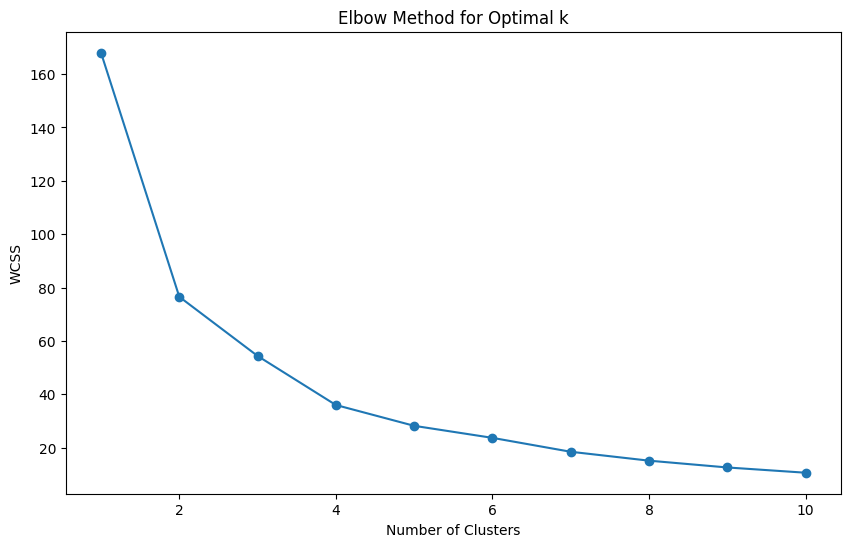

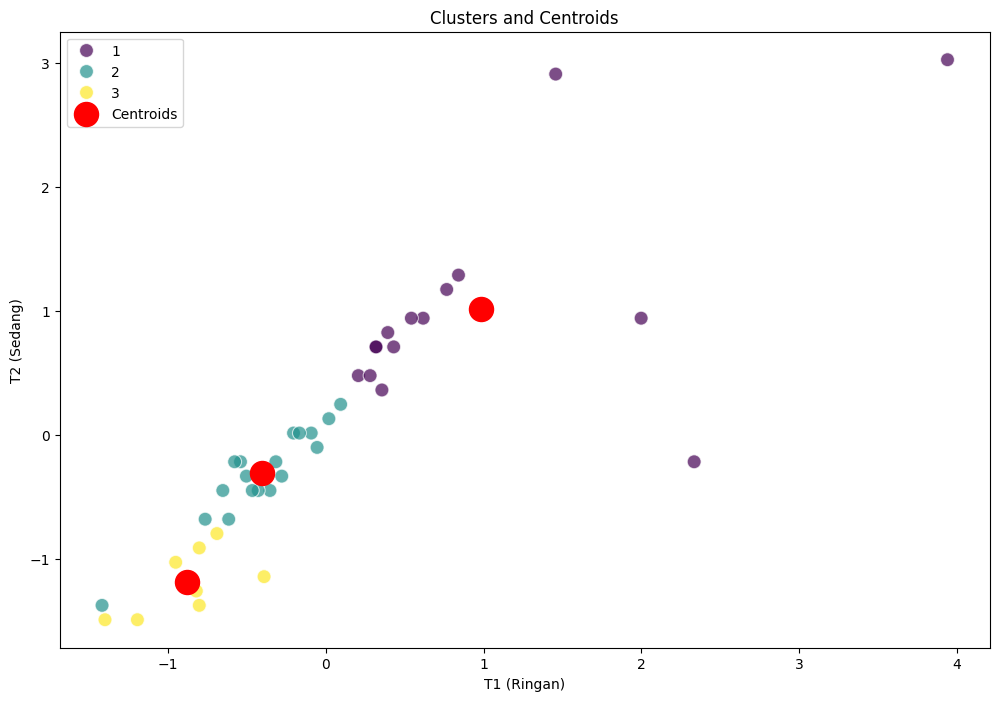

                  Hama  Cluster
0         Virus Kuning        1
1           Lalat Buah        1
2           Antraknose        1
3               Thrips        1
4            Kutu Daun        3
5               Tungau        3
6        Layu Fusarium        3
7          Layu Bakeri        3
8       Virus Keriting        2
9           Mati Pucuk        3
10           Puru Buah        3
11        Jamur Tepung        2
12         Bercak Daun        2
13        Busuk Akroot        2
14          Karat Daun        1
15        Busuk Batang        3
16   Penyakit Cendawan        2
17         Jamur Hitam        1
18         Luka Kering        1
19         Bintik Daun        2
20        Keriput Daun        1
21             Pustula        3
22         Busuk Basal        2
23   Serangan Nematoda        2
24        Gagal Tumbuh        2
25          Jamur Akar        2
26      Cendawan Hitam        1
27           Hama Kutu        2
28       Bercak Coklat        2
29          Busuk Umbi        2
30      

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Membaca Dataset
dataset = pd.read_csv('../UAS/datakerusakantanaman.csv')

# Tampilkan beberapa baris pertama dataset
print(dataset.head())

# 2. Pra-Pemrosesan Data
features = dataset[['T1 (Ringan)', 'T2 (Sedang)', 'T3 (Berat)', 'T4 (Ekstra Khusus)']]

# Standardisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Menentukan Jumlah Cluster Optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting grafik elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 4. Melakukan Clustering K-Means
# Terapkan K-Means dengan jumlah cluster yang dipilih (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Tambahkan label cluster ke dataset asli
dataset['Cluster'] = clusters + 1  # Menyesuaikan nomor cluster menjadi 1, 2, 3

# 5. Visualisasi Hasil Clustering
# Buat DataFrame untuk visualisasi
clustered_data = pd.DataFrame(features_scaled, columns=['T1 (Ringan)', 'T2 (Sedang)', 'T3 (Berat)', 'T4 (Ekstra Khusus)'])
clustered_data['Cluster'] = clusters + 1  # Menyesuaikan nomor cluster menjadi 1, 2, 3

plt.figure(figsize=(12, 8))
sns.scatterplot(data=clustered_data, x='T1 (Ringan)', y='T2 (Sedang)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('T1 (Ringan)')
plt.ylabel('T2 (Sedang)')
plt.legend()
plt.show()

# 6. Menampilkan Hasil Clustering
# Menampilkan hasil akhir yang sesuai dengan format dataset
print(dataset[['Hama', 'Cluster']])

# 7. Menghitung Jarak Euclidean ke Centroid
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

# Cek jarak dari beberapa data point ke centroid
data_points = {
    "Lalat Buah": np.array([14.50, 2.00, 0.25, 0.10]),
    # Tambahkan data point lainnya sesuai kebutuhan
}

for name, point in data_points.items():
    distances = [euclidean_distance(point, centroid) for centroid in kmeans.cluster_centers_]
    closest_cluster = np.argmin(distances) + 1
    print(f"\nJarak Euclidean dari {name}:")
    for i, distance in enumerate(distances):
        print(f"Jarak ke Centroid {i + 1}: {distance:.2f}")
    print(f"Cluster Terdekat: {closest_cluster}")


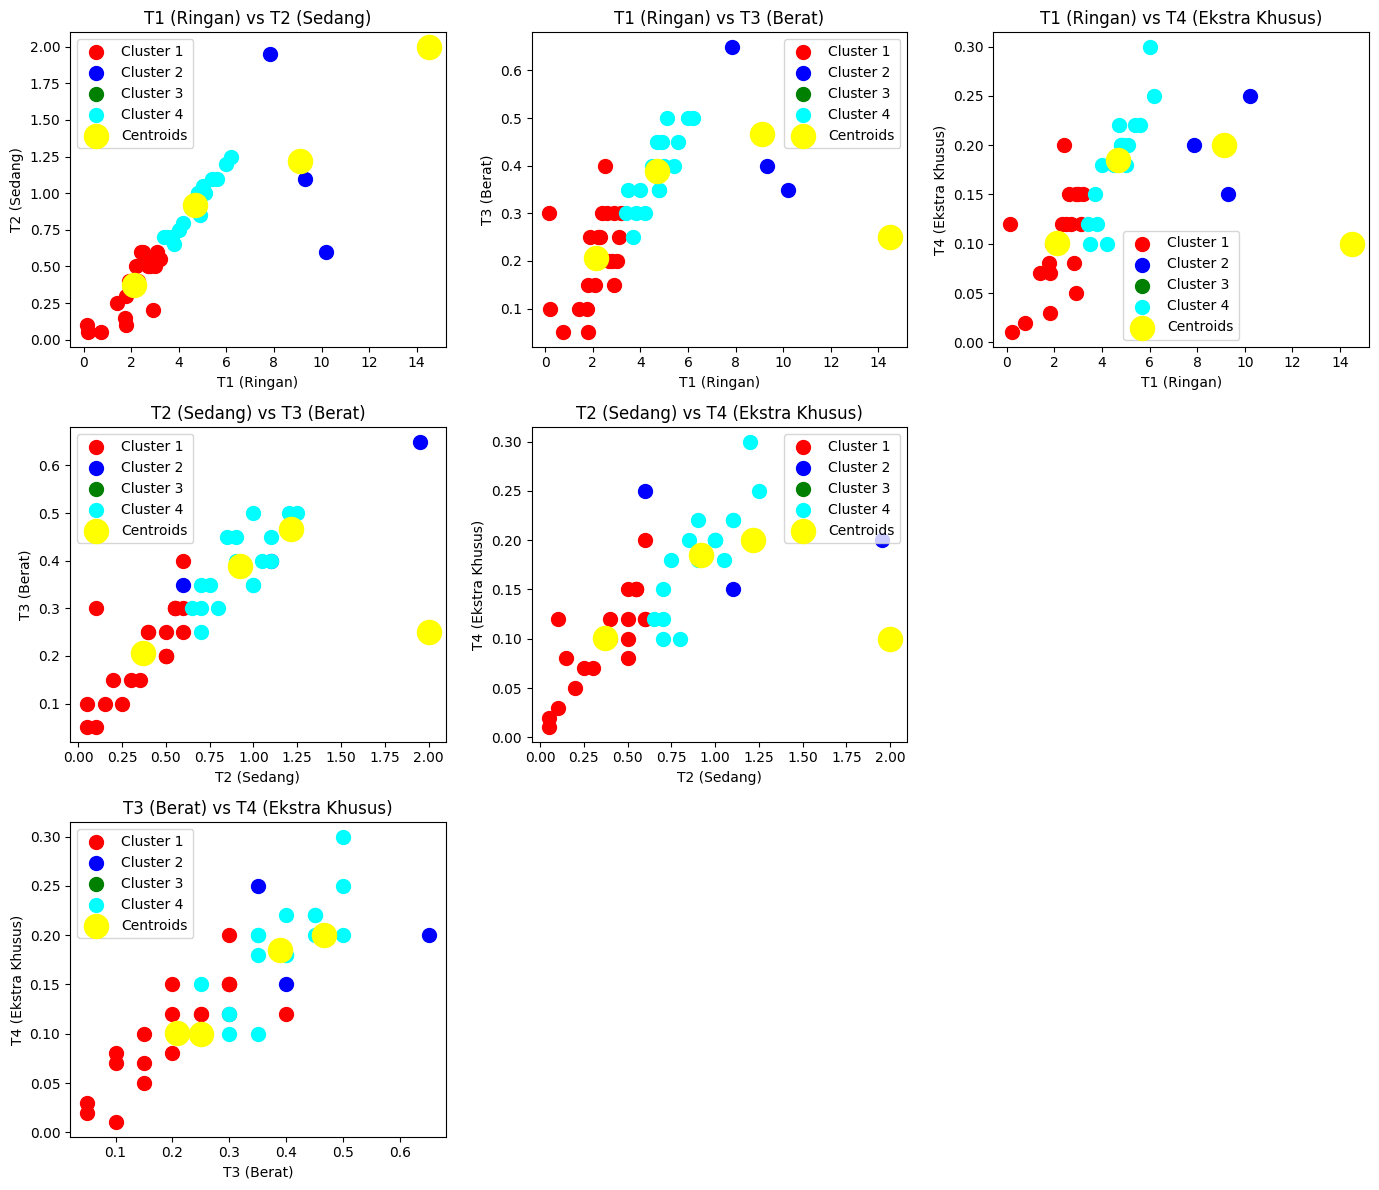

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

dataset = pd.read_csv('../UAS/datakerusakantanaman.csv')  # Update path if necessary

# Select features for clustering
X = dataset.iloc[:, 1:].values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotting
features = ['T1 (Ringan)', 'T2 (Sedang)', 'T3 (Berat)', 'T4 (Ekstra Khusus)']

plt.figure(figsize=(14, 12))

for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(3, 3, i * 3 + j - i)
        plt.scatter(X[y_kmeans == 0, i], X[y_kmeans == 0, j], s=100, c='red', label='Cluster 1')
        plt.scatter(X[y_kmeans == 1, i], X[y_kmeans == 1, j], s=100, c='blue', label='Cluster 2')
        plt.scatter(X[y_kmeans == 2, i], X[y_kmeans == 2, j], s=100, c='green', label='Cluster 3')
        plt.scatter(X[y_kmeans == 3, i], X[y_kmeans == 3, j], s=100, c='cyan', label='Cluster 4')
        plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], s=300, c='yellow', label='Centroids')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'{features[i]} vs {features[j]}')
        plt.legend()

plt.tight_layout()
plt.show()